# WK8 Exploratory Data Analysis<hr style="border:2.4px solid #126782"> </hr>

Name: **Francis Gabriel T. Cayao** <br>
Course: **CPE2A**

Import **pandas**, **numpy**, and **matplotlib**

In [1012]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea 

In [1013]:
df = pd.read_csv(r"..\raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [1014]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


## Chips Manufactured

In [1015]:
df_w = df.copy()

In [1016]:
chip_count = df_w ['Vendor'].value_counts()
chip_count

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

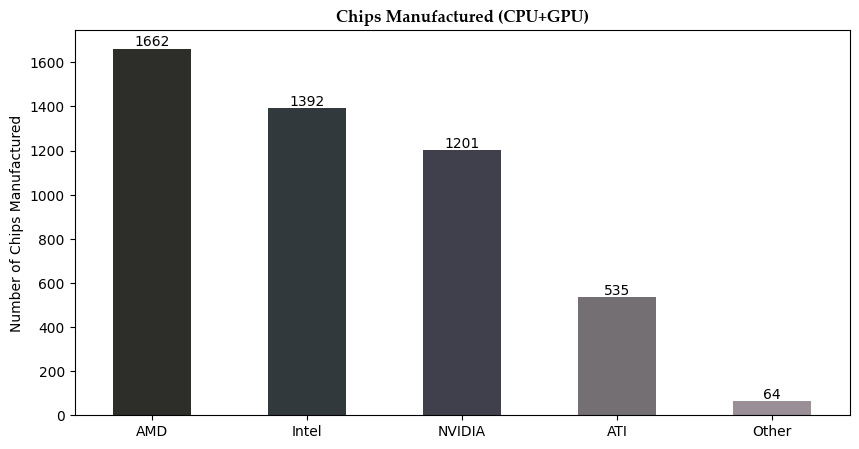

In [1017]:
chart = chip_count.plot(kind='bar',
                        color = ['#2D2D2A','#31393C','#403F4C','#736F72','#9A8F97'],
                        figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily = 'Palatino Linotype',
          fontsize = 12,
          fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('Number of Chips Manufactured')
plt.show()

## CPU Manufactured

In [1018]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,4/6/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,Intel
2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,AMD
2189,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.000000,291.000000,2333,Intel,Intel
2190,AMD Opteron 246,CPU,12/1/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,AMD


In [1019]:
cpu_count = df_cpu['Vendor'].value_counts()
cpu_count

Vendor
Intel    1242
AMD       950
Name: count, dtype: int64

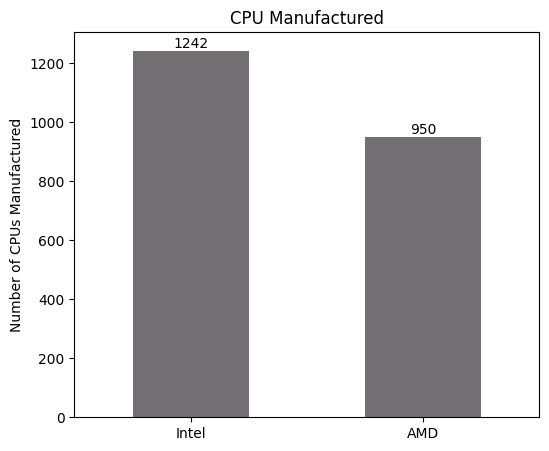

In [1020]:
chart = cpu_count.plot(kind='bar', figsize=(6,5),
                       color =['#736F72'])
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('CPU Manufactured')
plt.ylabel('Number of CPUs Manufactured')
plt.xlabel('')
chart.set_xticklabels(cpu_count.index, rotation=0)
plt.show()

## GPU Manufactured

In [1021]:
df_gpu = df_w[df_w['Type']=='GPU']
df_gpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
2192,Intel Xeon E3-1275,GPU,4/3/2011,32.0,95.000000,216.000000,1160.000000,100,Intel,Intel
2193,Matrox Parhelia 128 MB,GPU,6/25/2002,150.0,81.359981,174.000000,80.000000,200,UMC,Other
2194,NVIDIA GeForce MX150 GP107,GPU,2/23/2019,14.0,25.000000,132.000000,3300.000000,1469,Samsung,NVIDIA
2195,Intel GMA 500,GPU,3/2/2008,130.0,81.359981,188.440445,1929.922279,200,Intel,Intel
2196,ATI Radeon HD 4350 AGP,GPU,9/30/2008,55.0,20.000000,73.000000,242.000000,600,TSMC,ATI
...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2/22/2011,40.0,75.000000,332.000000,1950.000000,450,TSMC,NVIDIA
4850,Intel GMA 950,GPU,6/1/2005,90.0,7.000000,188.440445,1929.922279,250,Intel,Intel
4851,NVIDIA GeForce GT 320M,GPU,3/3/2010,40.0,23.000000,100.000000,486.000000,500,TSMC,NVIDIA
4852,NVIDIA GeForce FX 5200,GPU,3/6/2003,150.0,81.359981,65.000000,29.000000,250,TSMC,NVIDIA


In [1022]:
gpu_count = df_gpu['Vendor'].value_counts()
gpu_count

Vendor
NVIDIA    1201
AMD        712
ATI        535
Intel      150
Other       64
Name: count, dtype: int64

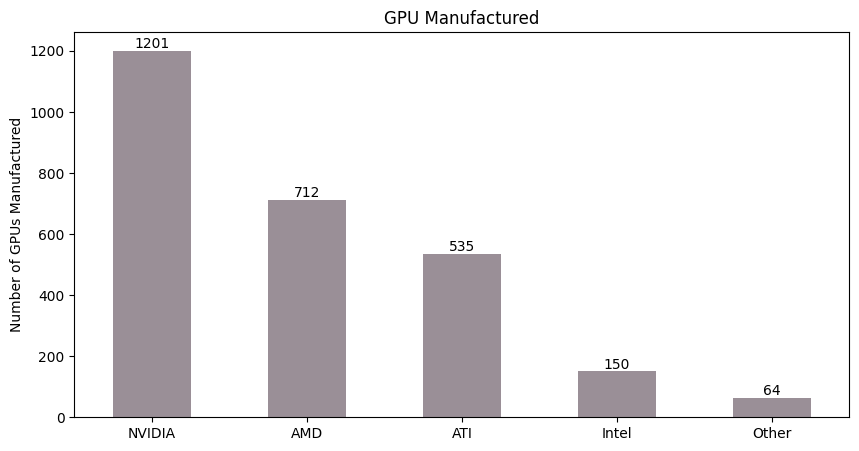

In [1023]:
chart = gpu_count.plot(kind='bar', figsize=(10,5),
                       color =['#9A8F97'])
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('GPU Manufactured')
plt.ylabel('Number of GPUs Manufactured')
plt.xlabel('')
chart.set_xticklabels(gpu_count.index, rotation=0)
plt.show()

## CPU and GPU Process Size Trend

### CPU Process Size Trend

In [1024]:
df_cpups = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='CPU').dropna()
df_cpups

,Type,Date,Process_Size
0,CPU,2/20/2007,65.0
1,CPU,9/6/2018,14.0
2,CPU,9/2/2020,10.0
3,CPU,9/1/2013,22.0
4,CPU,5/3/2011,45.0
...,...,...,...
2187,CPU,4/6/2021,10.0
2188,CPU,3/16/2020,7.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,90.0


In [1025]:
df_cpups['Date'] = pd.to_datetime(df_cpups['Date'])
df_cpups['Year'] = df_cpups['Date'].dt.year
df_cpups 

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,10.0,2021.0
2188,CPU,2020-03-16,7.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,90.0,2004.0


In [1026]:
df_cpups = df_cpups.groupby('Year')['Process_Size'].mean().reset_index()
df_cpups

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


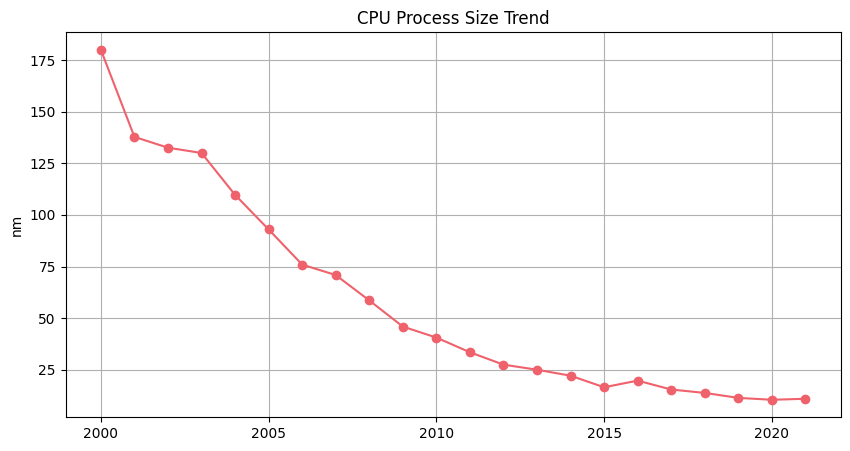

In [1027]:
plt.figure(figsize=(10,5))
plt.plot(df_cpups['Year'],df_cpups['Process_Size'], color='#EF626C',marker='o')
plt.title('CPU Process Size Trend')
plt.grid()
plt.ylabel('nm')
plt.show()

### GPU Process Size Trend

In [1028]:
df_gpups = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_gpups

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [1029]:
df_gpups['Date'] = pd.to_datetime(df_gpups['Date'])
df_gpups['Year'] = df_gpups['Date'].dt.year
df_gpups 

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [1030]:
df_gpups = df_gpups.groupby('Year')['Process_Size'].mean().reset_index()
df_gpups

,Year,Process_Size
0,2000.0,189.642857
1,2001.0,165.000000
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.740385


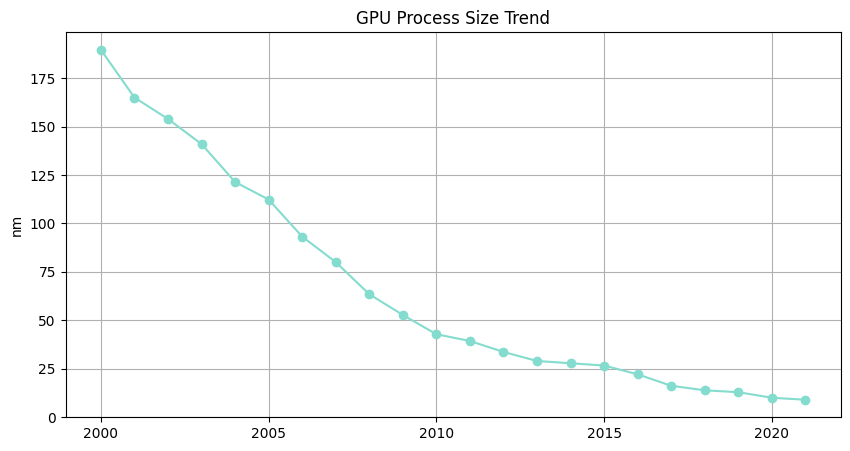

In [1031]:
plt.figure(figsize=(10,5))
plt.plot(df_gpups['Year'],df_gpups['Process_Size'], color='#84DCCF',marker='o')
plt.title('GPU Process Size Trend')
plt.grid()
plt.ylabel('nm')
plt.show()

### Graph Comparison of CPU and GPU Process Size Trend

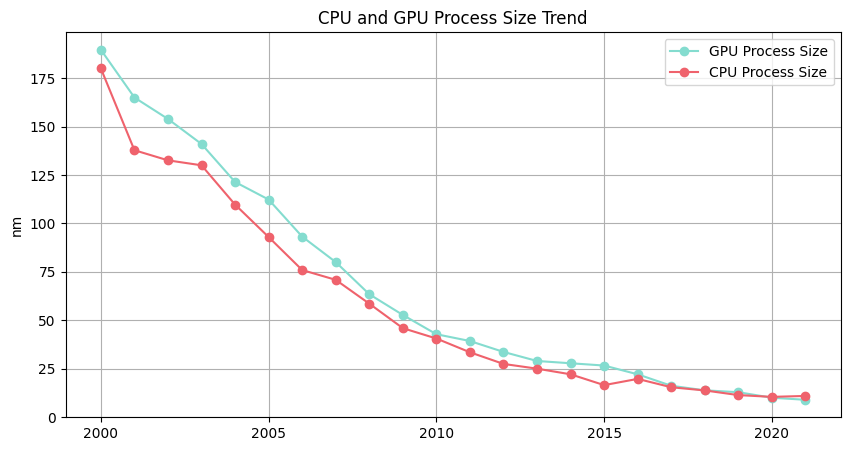

In [1032]:
plt.figure(figsize=(10,5))
plt.plot(df_gpups['Year'],df_gpups['Process_Size'], color='#84DCCF',marker='o', label="GPU Process Size")
plt.plot(df_cpups['Year'],df_cpups['Process_Size'], color='#EF626C',marker='o', label="CPU Process Size")
plt.title('CPU and GPU Process Size Trend')
plt.legend()
plt.grid()
plt.ylabel('nm')
plt.show()

The trend of CPU and GPU process sizes, expressed in nanometers (nm), from 2000 to 2020 is depicted in the graph. As semiconductor manufacturing has advanced, CPU and GPU process sizes have consistently decreased over time. Both CPU and GPU process sizes were initially above 150 nm in the early 2000s, with GPUs having slightly bigger process sizes than CPUs. Process sizes drastically decreased as technology advanced, falling below 10 nm by 2020. According to the pattern, GPUs and CPUs have a similar path over time, with GPUs often continuing to have slightly higher process sizes than CPUs. Modern CPUs operate better, use less power, and have more transistors because to this process size reduction.

## Lowest TDP (Thermal Design Power)

In [1033]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [1034]:
df_tdp = df_tdp.sort_values(by='TDP',ascending=True)
df_tdp

,Product,TDP
2175,Intel Atom Z612,1.0
1964,Intel Atom Z600,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
60,Intel Atom Z515,1.0
...,...,...
4605,NVIDIA Quadro Plex 2100 S4,640.0
2908,NVIDIA Tesla S1075,800.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0


In [1035]:
df_tdp = df_tdp.head(7)
df_tdp

,Product,TDP
2175,Intel Atom Z612,1.0
1964,Intel Atom Z600,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
60,Intel Atom Z515,1.0
1761,Intel Atom Z610,1.0
1424,Intel Atom Z510,2.0


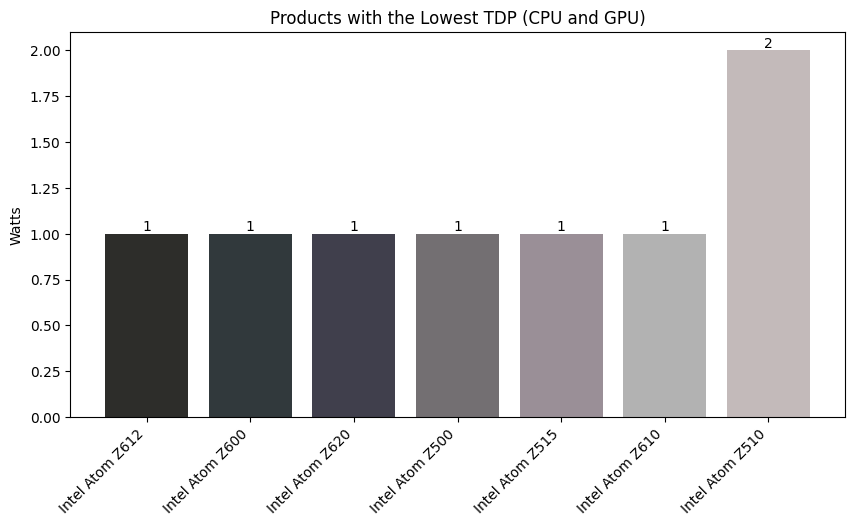

In [1036]:
plt.figure(figsize=(10,5))
bars = plt.bar(df_tdp['Product'],df_tdp['TDP'], color = ['#2D2D2A','#31393C','#403F4C','#736F72','#9A8F97','#B2B2B2','#C3BABA'] )
plt.bar_label(bars)
plt.title('Products with the Lowest TDP (CPU and GPU)')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

## Highest TDP (Thermal Design Power)

In [1037]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [1038]:
df_tdp = df_tdp.sort_values(by='TDP',ascending=False)
df_tdp

,Product,TDP
4821,NVIDIA Tesla S2050,900.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0
2908,NVIDIA Tesla S1075,800.0
4420,NVIDIA Quadro Plex 1000 Model II,640.0
...,...,...
1550,Intel Atom Z500,1.0
1761,Intel Atom Z610,1.0
469,Intel Atom Z620,1.0
2175,Intel Atom Z612,1.0


In [1039]:
df_tdp = df_tdp.head(7)
df_tdp

,Product,TDP
4821,NVIDIA Tesla S2050,900.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0
2908,NVIDIA Tesla S1075,800.0
4420,NVIDIA Quadro Plex 1000 Model II,640.0
4735,NVIDIA Quadro Plex 2200 D2,640.0
2522,NVIDIA Quadro Plex 2100 D4,640.0


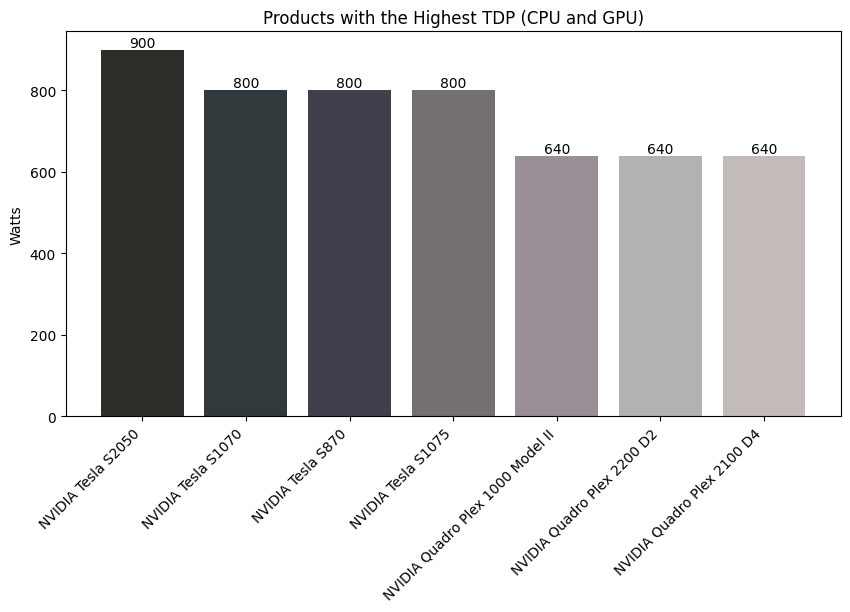

In [1040]:
plt.figure(figsize=(10,5))
bars = plt.bar(df_tdp['Product'],df_tdp['TDP'], color = ['#2D2D2A','#31393C','#403F4C','#736F72','#9A8F97','#B2B2B2','#C3BABA'] )
plt.bar_label(bars)
plt.title('Products with the Highest TDP (CPU and GPU)')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

## CPU and GPU TDP(Thermal Design Power) Trend

### CPU TDP(Thermal Design Power) Trend

In [1041]:
df_cputd = df_w[['Type','Date','TDP']].where(df_w['Type']=='CPU').dropna()
df_cputd

,Type,Date,TDP
0,CPU,2/20/2007,45.0
1,CPU,9/6/2018,35.0
2,CPU,9/2/2020,28.0
3,CPU,9/1/2013,80.0
4,CPU,5/3/2011,125.0
...,...,...,...
2187,CPU,4/6/2021,185.0
2188,CPU,3/16/2020,54.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,85.0


In [1042]:
df_cputd['Date'] = pd.to_datetime(df_cputd['Date'])
df_cputd['Year'] = df_cputd['Date'].dt.year
df_cputd 

,Type,Date,TDP,Year
0,CPU,2007-02-20,45.0,2007.0
1,CPU,2018-09-06,35.0,2018.0
2,CPU,2020-09-02,28.0,2020.0
3,CPU,2013-09-01,80.0,2013.0
4,CPU,2011-05-03,125.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,185.0,2021.0
2188,CPU,2020-03-16,54.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,85.0,2004.0


In [1043]:
df_cputd = df_cputd.groupby('Year')['TDP'].mean().reset_index()
df_cputd

,Year,TDP
0,2000.0,50.470588
1,2001.0,59.186047
2,2002.0,68.487179
3,2003.0,73.630137
4,2004.0,78.250000
5,2005.0,79.525974
6,2006.0,72.822222
7,2007.0,56.608696
8,2008.0,63.589286
9,2009.0,74.426087


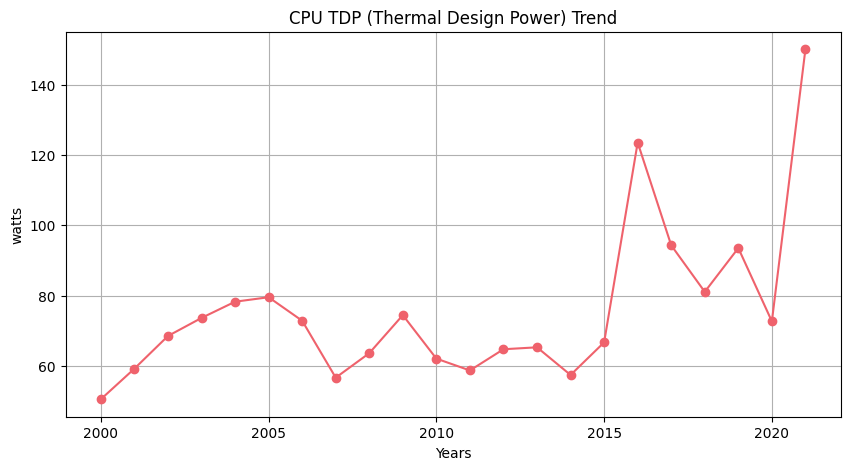

In [1044]:
plt.figure(figsize=(10,5))
plt.plot(df_cputd['Year'],df_cputd['TDP'], color='#EF626C',marker='o')
plt.title('CPU TDP (Thermal Design Power) Trend')
plt.grid()
plt.ylabel('watts')
plt.xlabel('Years')
plt.show()

### GPU TDP(Thermal Design Power) Trend

In [1045]:
df_gputd = df_w[['Type','Date','TDP']].where(df_w['Type']=='GPU').dropna()
df_gputd

,Type,Date,TDP
2192,GPU,4/3/2011,95.000000
2193,GPU,6/25/2002,81.359981
2194,GPU,2/23/2019,25.000000
2195,GPU,3/2/2008,81.359981
2196,GPU,9/30/2008,20.000000
...,...,...,...
4849,GPU,2/22/2011,75.000000
4850,GPU,6/1/2005,7.000000
4851,GPU,3/3/2010,23.000000
4852,GPU,3/6/2003,81.359981


In [1046]:
df_gputd['Date'] = pd.to_datetime(df_gputd['Date'])
df_gputd['Year'] = df_gputd['Date'].dt.year
df_gputd 

,Type,Date,TDP,Year
2192,GPU,2011-04-03,95.000000,2011.0
2193,GPU,2002-06-25,81.359981,2002.0
2194,GPU,2019-02-23,25.000000,2019.0
2195,GPU,2008-03-02,81.359981,2008.0
2196,GPU,2008-09-30,20.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,75.000000,2011.0
4850,GPU,2005-06-01,7.000000,2005.0
4851,GPU,2010-03-03,23.000000,2010.0
4852,GPU,2003-03-06,81.359981,2003.0


In [1047]:
df_gputd = df_gputd.groupby('Year')['TDP'].mean().reset_index()
df_gputd

,Year,TDP
0,2000.0,55.258657
1,2001.0,65.297946
2,2002.0,75.419693
3,2003.0,69.121414
4,2004.0,68.908296
5,2005.0,75.262725
6,2006.0,63.032552
7,2007.0,69.652653
8,2008.0,95.534565
9,2009.0,73.114337


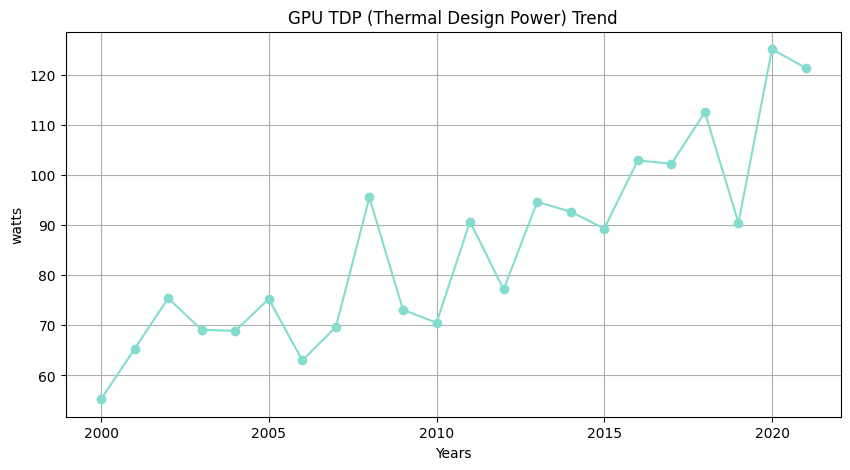

In [1048]:
plt.figure(figsize=(10,5))
plt.plot(df_gputd['Year'],df_gputd['TDP'], color='#84DCCF',marker='o')
plt.title('GPU TDP (Thermal Design Power) Trend')
plt.grid()
plt.ylabel('watts')
plt.xlabel('Years')
plt.show()

### CPU and GPU TDP Comparison

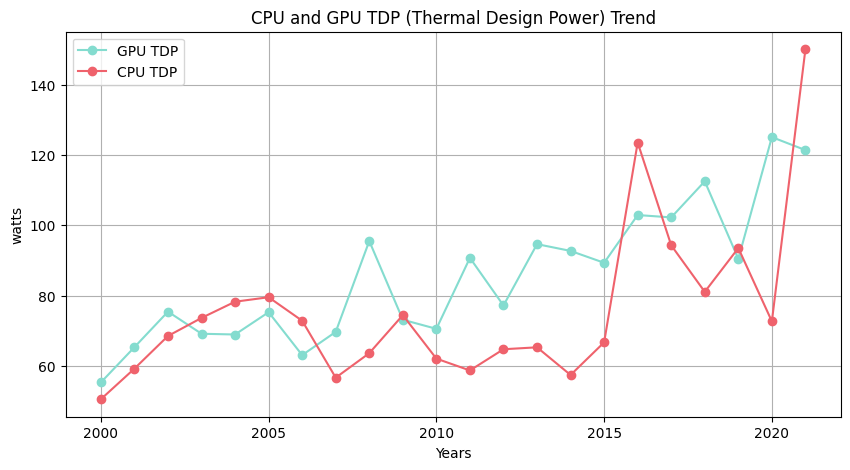

In [1049]:
plt.figure(figsize=(10,5))
plt.plot(df_gputd['Year'],df_gputd['TDP'], color='#84DCCF',marker='o', label="GPU TDP")
plt.plot(df_cputd['Year'],df_cputd['TDP'], color='#EF626C',marker='o', label="CPU TDP")
plt.title('CPU and GPU TDP (Thermal Design Power) Trend')
plt.legend()
plt.grid()
plt.ylabel('watts')
plt.xlabel('Years')
plt.show()

The graph shows the trend of Thermal Design Power (TDP), expressed in watts (W), for CPUs and GPUs from 2000 to 2020. This graph displays variations and an overall rising trend in TDP for both CPUs and GPUs, in contrast to the process size trend, which typically declines over time. TDP values were comparatively modest in the early 2000s, ranging from 50 to 80W, but they showed sporadic rises and falls throughout time. There was a discernible rising trend after 2010, with more regular surges. According to the tendency, processors' needs for heat dissipation and energy consumption rose as their power increased. In recent years, especially close to 2020, there are significant peaks in both CPU and GPU TDP values, indicating a push toward higher-performance computing despite increased power demands.

## CPU and GPU Die Size Trend

### CPU Die Size Trend

In [1050]:
df_dscpu = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='CPU').dropna()
df_dscpu

,Type,Date,Die_Size
0,CPU,2/20/2007,77.000000
1,CPU,9/6/2018,192.000000
2,CPU,9/2/2020,188.440445
3,CPU,9/1/2013,160.000000
4,CPU,5/3/2011,258.000000
...,...,...,...
2187,CPU,4/6/2021,188.440445
2188,CPU,3/16/2020,156.000000
2189,CPU,7/1/2007,143.000000
2190,CPU,12/1/2004,188.440445


In [1051]:
df_dscpu['Date'] = pd.to_datetime(df_dscpu['Date'])
df_dscpu['Year'] = df_dscpu['Date'].dt.year
df_dscpu 

,Type,Date,Die_Size,Year
0,CPU,2007-02-20,77.000000,2007.0
1,CPU,2018-09-06,192.000000,2018.0
2,CPU,2020-09-02,188.440445,2020.0
3,CPU,2013-09-01,160.000000,2013.0
4,CPU,2011-05-03,258.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,188.440445,2021.0
2188,CPU,2020-03-16,156.000000,2020.0
2189,CPU,2007-07-01,143.000000,2007.0
2190,CPU,2004-12-01,188.440445,2004.0


In [1052]:
#for CPU
df_dscpu = df_dscpu.groupby('Year')['Die_Size'].mean().reset_index()
df_dscpu

,Year,Die_Size
0,2000.0,129.058824
1,2001.0,124.872093
2,2002.0,130.641026
3,2003.0,168.835123
4,2004.0,148.858889
5,2005.0,155.710329
6,2006.0,172.474156
7,2007.0,134.437713
8,2008.0,163.509349
9,2009.0,185.695652


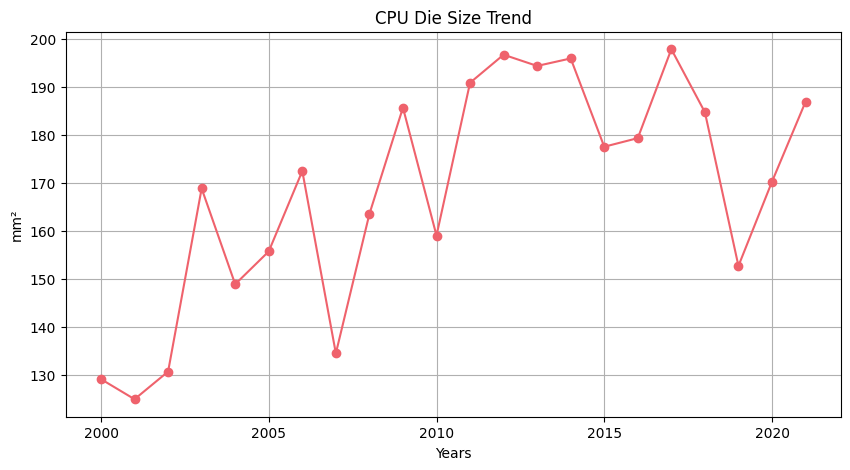

In [1053]:
plt.figure(figsize=(10,5))
plt.plot(df_dscpu['Year'],df_dscpu['Die_Size'], color='#EF626C',marker='o')
plt.title('CPU Die Size Trend')
plt.ylabel('mm²')
plt.xlabel('Years')
plt.grid(True)
plt.show()

### GPU Die Size Trend

In [1054]:
df_dsgpu = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='GPU').dropna()
df_dsgpu

,Type,Date,Die_Size
2192,GPU,4/3/2011,216.000000
2193,GPU,6/25/2002,174.000000
2194,GPU,2/23/2019,132.000000
2195,GPU,3/2/2008,188.440445
2196,GPU,9/30/2008,73.000000
...,...,...,...
4849,GPU,2/22/2011,332.000000
4850,GPU,6/1/2005,188.440445
4851,GPU,3/3/2010,100.000000
4852,GPU,3/6/2003,65.000000


In [1055]:
df_dsgpu['Date'] = pd.to_datetime(df_dsgpu['Date'])
df_dsgpu['Year'] = df_dsgpu['Date'].dt.year
df_dsgpu 

,Type,Date,Die_Size,Year
2192,GPU,2011-04-03,216.000000,2011.0
2193,GPU,2002-06-25,174.000000,2002.0
2194,GPU,2019-02-23,132.000000,2019.0
2195,GPU,2008-03-02,188.440445,2008.0
2196,GPU,2008-09-30,73.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,332.000000,2011.0
4850,GPU,2005-06-01,188.440445,2005.0
4851,GPU,2010-03-03,100.000000,2010.0
4852,GPU,2003-03-06,65.000000,2003.0


In [1056]:
#for GPU
df_dsgpu = df_dsgpu.groupby('Year')['Die_Size'].mean().reset_index()
df_dsgpu

,Year,Die_Size
0,2000.0,106.848015
1,2001.0,111.924925
2,2002.0,114.646995
3,2003.0,138.633286
4,2004.0,176.308971
5,2005.0,188.639598
6,2006.0,175.216775
7,2007.0,174.506855
8,2008.0,197.312619
9,2009.0,176.377358


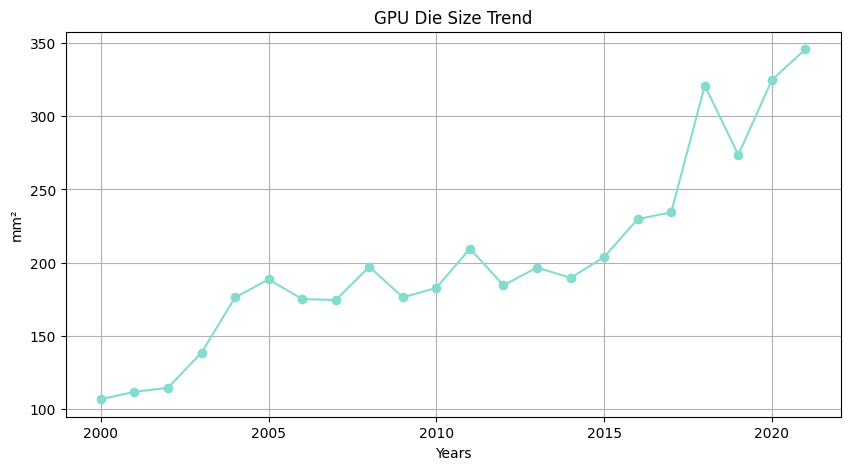

In [1057]:
plt.figure(figsize=(10,5))
plt.plot(df_dsgpu['Year'],df_dsgpu['Die_Size'], color='#84DCCF',marker='o')
plt.title('GPU Die Size Trend')
plt.ylabel('mm²')
plt.xlabel('Years')
plt.grid(True)
plt.show()

### Graph Comparison of CPU and GPU Die Size Trend

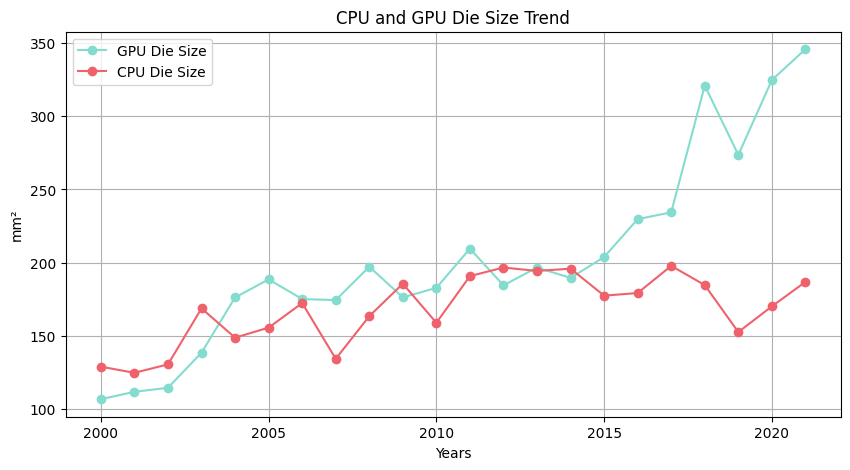

In [1058]:
plt.figure(figsize=(10,5))
plt.plot(df_dsgpu['Year'],df_dsgpu['Die_Size'], color='#84DCCF',marker='o', label="GPU Die Size")
plt.plot(df_dscpu['Year'],df_dscpu['Die_Size'], color='#EF626C',marker='o', label="CPU Die Size")
plt.title('CPU and GPU Die Size Trend')
plt.legend()
plt.ylabel('mm²')
plt.xlabel('Years')
plt.grid(True)
plt.show()

This graph displays the die size trends for CPUs and GPUs from 2000 to 2020. GPU chip sizes begin at about 100 mm² in 2000 and expand steadily until 2015, when they reach over 350 mm² by 2020. CPU die sizes, on the other hand, likewise increased until 2010, ranging from 150 mm² to 200 mm², but very slightly changed after that. This demonstrates that, in contrast to CPUs, which have reached a plateau in die sizes, GPUs have experienced significant growth in die sizes, which is indicative of their increasing complexity and need for greater performance.

## CPU and GPU Transistor Count Trend

### CPU Transistor Count Trend

In [1059]:
df_tscpu = df_w[['Type','Date','Transistors']].where(df_w['Type']=='CPU').dropna()
df_tscpu

,Type,Date,Transistors
0,CPU,2/20/2007,122.000000
1,CPU,9/6/2018,4800.000000
2,CPU,9/2/2020,1929.922279
3,CPU,9/1/2013,1400.000000
4,CPU,5/3/2011,758.000000
...,...,...,...
2187,CPU,4/6/2021,1929.922279
2188,CPU,3/16/2020,9800.000000
2189,CPU,7/1/2007,291.000000
2190,CPU,12/1/2004,106.000000


In [1060]:
df_tscpu['Date'] = pd.to_datetime(df_tscpu['Date'])
df_tscpu['Year'] = df_tscpu['Date'].dt.year
df_tscpu 

,Type,Date,Transistors,Year
0,CPU,2007-02-20,122.000000,2007.0
1,CPU,2018-09-06,4800.000000,2018.0
2,CPU,2020-09-02,1929.922279,2020.0
3,CPU,2013-09-01,1400.000000,2013.0
4,CPU,2011-05-03,758.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,1929.922279,2021.0
2188,CPU,2020-03-16,9800.000000,2020.0
2189,CPU,2007-07-01,291.000000,2007.0
2190,CPU,2004-12-01,106.000000,2004.0


In [1061]:
#for CPU
df_tscpu = df_tscpu.groupby('Year')['Transistors'].mean().reset_index()
df_tscpu

,Year,Transistors
0,2000.0,38.000000
1,2001.0,65.197674
2,2002.0,51.846154
3,2003.0,89.315068
4,2004.0,104.213235
5,2005.0,230.580378
6,2006.0,478.256880
7,2007.0,398.007734
8,2008.0,606.076101
9,2009.0,533.860870


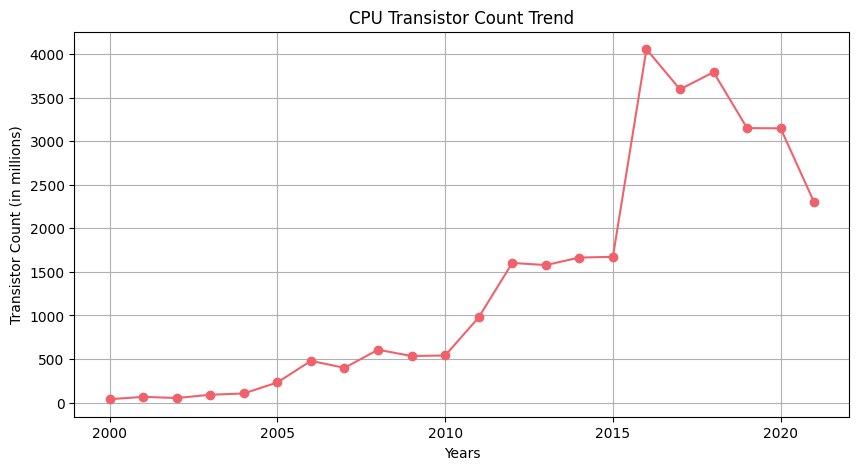

In [1062]:
plt.figure(figsize=(10,5))
plt.plot(df_tscpu['Year'],df_tscpu['Transistors'], color='#EF626C',marker='o')
plt.title('CPU Transistor Count Trend')
plt.ylabel('Transistor Count (in millions)')
plt.xlabel('Years')
plt.grid(True)
plt.show()

### GPU Transistor Count Trend

In [1063]:
df_tsgpu = df_w[['Type','Date','Transistors']].where(df_w['Type']=='GPU').dropna()
df_tsgpu

,Type,Date,Transistors
2192,GPU,4/3/2011,1160.000000
2193,GPU,6/25/2002,80.000000
2194,GPU,2/23/2019,3300.000000
2195,GPU,3/2/2008,1929.922279
2196,GPU,9/30/2008,242.000000
...,...,...,...
4849,GPU,2/22/2011,1950.000000
4850,GPU,6/1/2005,1929.922279
4851,GPU,3/3/2010,486.000000
4852,GPU,3/6/2003,29.000000


In [1064]:
df_tsgpu['Date'] = pd.to_datetime(df_tsgpu['Date'])
df_tsgpu['Year'] = df_tsgpu['Date'].dt.year
df_tsgpu 

,Type,Date,Transistors,Year
2192,GPU,2011-04-03,1160.000000,2011.0
2193,GPU,2002-06-25,80.000000,2002.0
2194,GPU,2019-02-23,3300.000000,2019.0
2195,GPU,2008-03-02,1929.922279,2008.0
2196,GPU,2008-09-30,242.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,1950.000000,2011.0
4850,GPU,2005-06-01,1929.922279,2005.0
4851,GPU,2010-03-03,486.000000,2010.0
4852,GPU,2003-03-06,29.000000,2003.0


In [1065]:
#for GPU
df_tsgpu = df_tsgpu.groupby('Year')['Transistors'].mean().reset_index()
df_tsgpu

,Year,Transistors
0,2000.0,215.525561
1,2001.0,119.568256
2,2002.0,104.273110
3,2003.0,139.747224
4,2004.0,332.929494
5,2005.0,294.678484
6,2006.0,348.024983
7,2007.0,388.793041
8,2008.0,566.823445
9,2009.0,613.830189


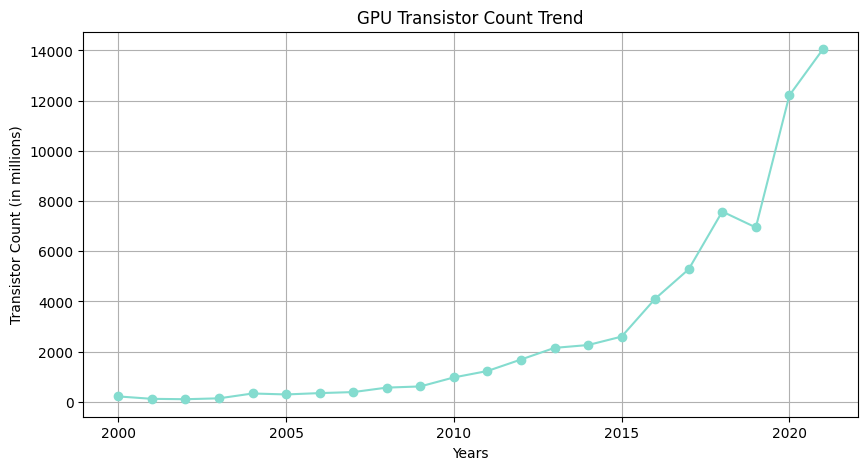

In [1066]:
plt.figure(figsize=(10,5))
plt.plot(df_tsgpu['Year'],df_tsgpu['Transistors'], color='#84DCCF',marker='o')
plt.title('GPU Transistor Count Trend')
plt.ylabel('Transistor Count (in millions)')
plt.xlabel('Years')
plt.grid(True)
plt.show()

### Graph Comparison of CPU and GPU Transistor Size

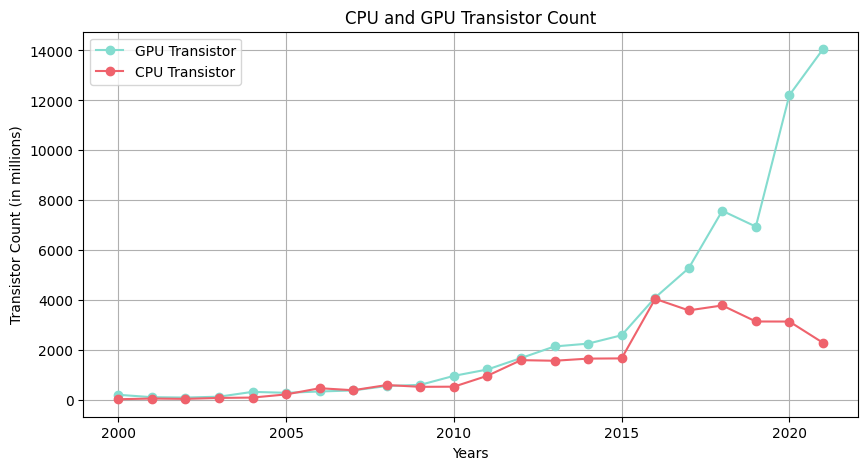

In [1067]:
plt.figure(figsize=(10,5))
plt.plot(df_tsgpu['Year'],df_tsgpu['Transistors'], color='#84DCCF',marker='o', label="GPU Transistor")
plt.plot(df_tscpu['Year'],df_tscpu['Transistors'], color='#EF626C',marker='o', label="CPU Transistor")
plt.title('CPU and GPU Transistor Count')
plt.legend()
plt.ylabel('Transistor Count (in millions)')
plt.xlabel('Years')
plt.grid(True)
plt.show()

Trends in transistor counts for CPUs and GPUs between 2000 and 2020 are shown in the graph. Until about 2010, there is little increase in the number of CPUs and GPUs. GPUs show a dramatic rise following this, particularly after 2015, and by 2020, they will have more than 14,000 million transistors. Conversely, CPU transistor counts increase gradually until about 2015, at which point they plateau and fall just below 4,000 million. This pattern demonstrates how quickly GPU architecture and design have advanced, outperforming CPUs in transistor density in subsequent years.

## CPU and GPU Frequency Trend

### CPU Frequency Trend

In [1068]:
df_freqcpu = df_w[['Type','Date','Frequency']].where(df_w['Type']=='CPU').dropna()
df_freqcpu

,Type,Date,Frequency
0,CPU,2/20/2007,2200.0
1,CPU,9/6/2018,3200.0
2,CPU,9/2/2020,2600.0
3,CPU,9/1/2013,1800.0
4,CPU,5/3/2011,3700.0
...,...,...,...
2187,CPU,4/6/2021,2400.0
2188,CPU,3/16/2020,3300.0
2189,CPU,7/1/2007,2333.0
2190,CPU,12/1/2004,2000.0


In [1069]:
df_freqcpu['Date'] = pd.to_datetime(df_freqcpu['Date'])
df_freqcpu['Year'] = df_freqcpu['Date'].dt.year
df_freqcpu 

,Type,Date,Frequency,Year
0,CPU,2007-02-20,2200.0,2007.0
1,CPU,2018-09-06,3200.0,2018.0
2,CPU,2020-09-02,2600.0,2020.0
3,CPU,2013-09-01,1800.0,2013.0
4,CPU,2011-05-03,3700.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,2400.0,2021.0
2188,CPU,2020-03-16,3300.0,2020.0
2189,CPU,2007-07-01,2333.0,2007.0
2190,CPU,2004-12-01,2000.0,2004.0


In [1070]:
#for CPU
df_freqcpu = df_freqcpu.groupby('Year')['Frequency'].mean().reset_index()
df_freqcpu

,Year,Frequency
0,2000.0,992.117647
1,2001.0,1801.662791
2,2002.0,2050.897436
3,2003.0,2155.369863
4,2004.0,2267.705882
5,2005.0,2409.831169
6,2006.0,2370.696296
7,2007.0,2180.652174
8,2008.0,2287.241071
9,2009.0,2519.904348


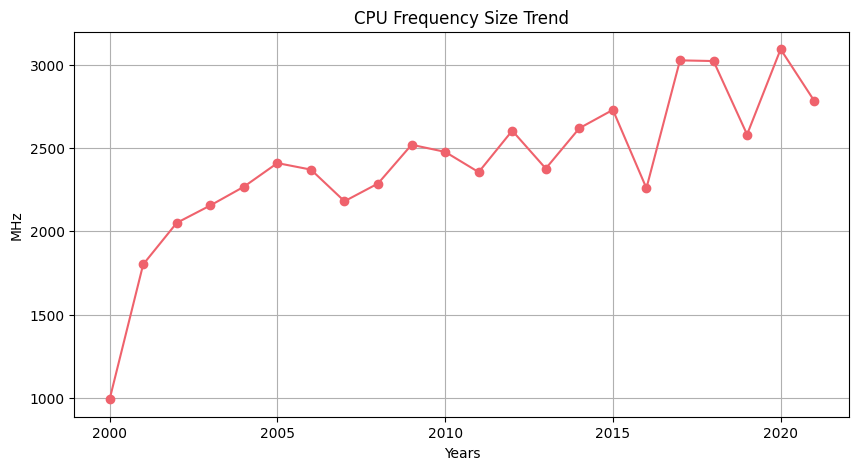

In [1071]:
plt.figure(figsize=(10,5))
plt.plot(df_freqcpu['Year'],df_freqcpu['Frequency'], color='#EF626C',marker='o')
plt.title('CPU Frequency Size Trend')
plt.ylabel('MHz')
plt.xlabel('Years')
plt.grid(True)
plt.show()

### GPU Frequency Trend

In [1072]:
df_freqgpu = df_w[['Type','Date','Frequency']].where(df_w['Type']=='GPU').dropna()
df_freqgpu

,Type,Date,Frequency
2192,GPU,4/3/2011,100.0
2193,GPU,6/25/2002,200.0
2194,GPU,2/23/2019,1469.0
2195,GPU,3/2/2008,200.0
2196,GPU,9/30/2008,600.0
...,...,...,...
4849,GPU,2/22/2011,450.0
4850,GPU,6/1/2005,250.0
4851,GPU,3/3/2010,500.0
4852,GPU,3/6/2003,250.0


In [1073]:
df_freqgpu['Date'] = pd.to_datetime(df_freqgpu['Date'])
df_freqgpu['Year'] = df_freqgpu['Date'].dt.year
df_freqgpu 

,Type,Date,Frequency,Year
2192,GPU,2011-04-03,100.0,2011.0
2193,GPU,2002-06-25,200.0,2002.0
2194,GPU,2019-02-23,1469.0,2019.0
2195,GPU,2008-03-02,200.0,2008.0
2196,GPU,2008-09-30,600.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,450.0,2011.0
4850,GPU,2005-06-01,250.0,2005.0
4851,GPU,2010-03-03,500.0,2010.0
4852,GPU,2003-03-06,250.0,2003.0


In [1074]:
#for GPU
df_freqgpu = df_freqgpu.groupby('Year')['Frequency'].mean().reset_index()
df_freqgpu

,Year,Frequency
0,2000.0,165.800000
1,2001.0,196.061224
2,2002.0,244.289855
3,2003.0,304.803571
4,2004.0,367.376923
5,2005.0,405.273684
6,2006.0,460.472868
7,2007.0,524.360759
8,2008.0,564.190751
9,2009.0,584.584906


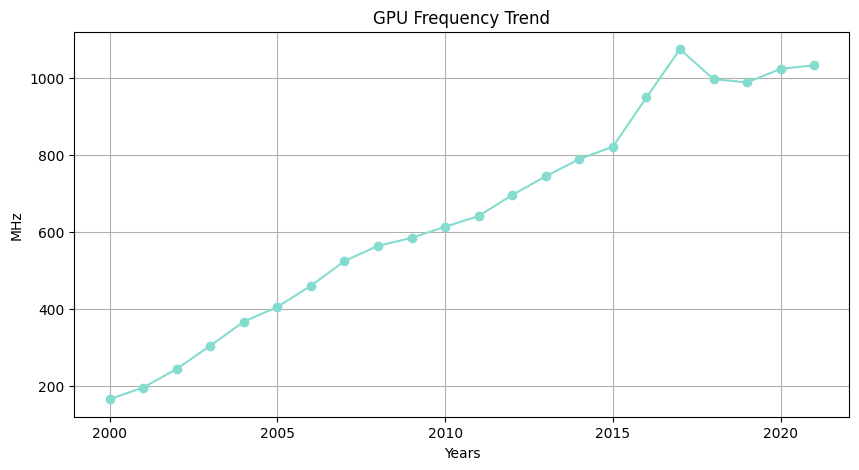

In [1075]:
plt.figure(figsize=(10,5))
plt.plot(df_freqgpu['Year'],df_freqgpu['Frequency'], color='#84DCCF',marker='o')
plt.title('GPU Frequency Trend')
plt.ylabel('MHz')
plt.xlabel('Years')
plt.grid(True)
plt.show()

### Graph Comparison CPU and GPU Frequency Trend 

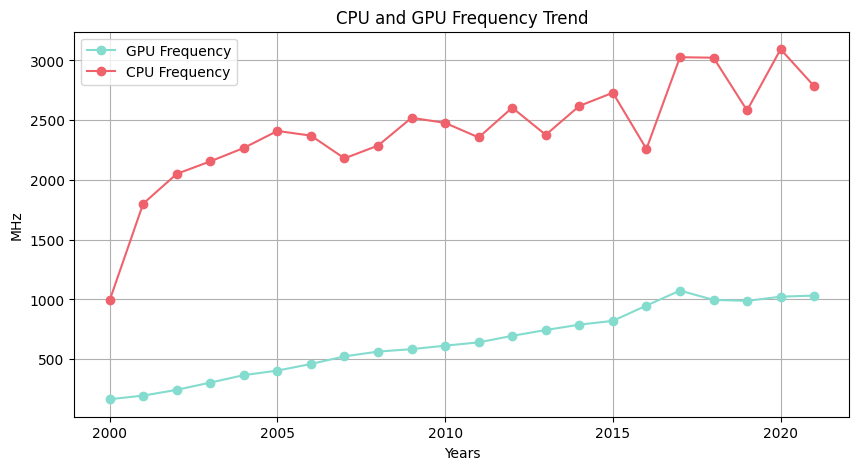

In [1076]:
plt.figure(figsize=(10,5))
plt.plot(df_freqgpu['Year'],df_freqgpu['Frequency'], color='#84DCCF',marker='o', label="GPU Frequency")
plt.plot(df_freqcpu['Year'],df_freqcpu['Frequency'], color='#EF626C',marker='o', label="CPU Frequency")
plt.title('CPU and GPU Frequency Trend')
plt.legend()
plt.ylabel('MHz')
plt.xlabel('Years')
plt.grid(True)
plt.show()

The CPU and GPU frequency trends from 2000 to 2020 are depicted in the graph. Up until about 2005, CPU frequencies climb quickly, surpassing 2500 MHz. After that, the trend levels out and shifts between 2500 and 3200 MHz. On the other hand, GPU frequencies show consistent growth over the course of the 20 years, beginning below 500 MHz in 2000 and progressively rising to almost 1000 MHz by 2020. This demonstrates the stark contrast in optimization tendencies, with GPUs seeing steady, gradual improvements over time and CPUs seeing early, sharp advances followed by stasis.